In [24]:
using Pkg
Pkg.activate("../")

┌ Error: Failed to revise /Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl
│   exception =
│    ParseError:
│    # Error @ ]8;;file:///Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl#77:21\/Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl:77:21]8;;\
│        include("plots/plots_qtl.jl")
│    #                   ┌─────────
│        export plot_QTL plot_QTL! 
│    
│        include("plots/plots_manhattan.jl")
│    #────────────────────────────────────┘ ── Expected `end`
│    Stacktrace:
│     [1] top-level scope
│       @ none:1
└ @ Revise ~/.julia/packages/Revise/bAgL0/src/packagedef.jl:724
┌ Warning: The running code does not match the saved version for the following files:
│ 
│   /Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl
│ 
│ If the error was due to evaluation order, it can sometimes be resolved by calling `Revise.retry()`.
│ Use Revise.errors() to report errors again. Only the first error in each file is shown.
│ Your prompt color ma

In [25]:
Pkg.instantiate()

Precompiling project...
        Info Given BigRiverQTL was explicitly requested, output will be shown live 
ERROR: LoadError: ParseError:
# Error @ ]8;;file:///Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl#77:21\/Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl:77:21]8;;\
    include("plots/plots_qtl.jl")
#                   ┌─────────
    export plot_QTL plot_QTL! 

    include("plots/plots_manhattan.jl")
#────────────────────────────────────┘ ── Expected `end`
Stacktrace:
 [1] top-level scope
   @ ~/git/BigRiverQTL.jl/src/BigRiverQTL.jl:77
 [2] include
   @ ./Base.jl:495 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::Nothing)
   @ Base ./loading.jl:2222
 [4] top-level scope
   @ stdin:3
in expression starting at /Users/durbadalghosh/git/BigRiverQTL.jl/src/BigRiverQTL.jl:77
in expression start

In [6]:
using Revise

In [7]:
# Libraries
using BigRiverQTLPlots
using Random, Statistics
using Plots
using Helium
using BigRiverQTL
using CSV
using DataFrames
using BulkLMM

In [8]:
##############
# BXD spleen #
##############

########
# Data #
########
data_dir = joinpath(@__DIR__, "../data/BXD/");
file = joinpath(data_dir, "bxd.json");

In [9]:
# Transforming data to a optimised and accessible data type
data = get_geneticstudydata(file);

In [10]:
# Data types
gInfo=data.gmap;
pInfo=data.phenocov;
pheno=data.pheno;
pheno=data.pheno.val;
geno=reduce(hcat, data.geno.val);
geno_processed=convert(Array{Float64}, geno);

In [11]:
#################
# Preprocessing #
#################
traitID = 1112;
pheno_y = pheno[:, traitID];
pheno_y2=ones(length(pheno_y));
idx_nothing = findall(x->x!=nothing,pheno_y)
pheno_y2[idx_nothing]=pheno_y[idx_nothing];

In [12]:
###########
# Kinship #
###########
kinship = kinship_gs(geno_processed,.99);

In [13]:
########
# Scan #
########

single_results_perms = scan(
	pheno_y2,
	geno_processed,
	kinship;
	permutation_test = true,
	nperms = 1000,
);

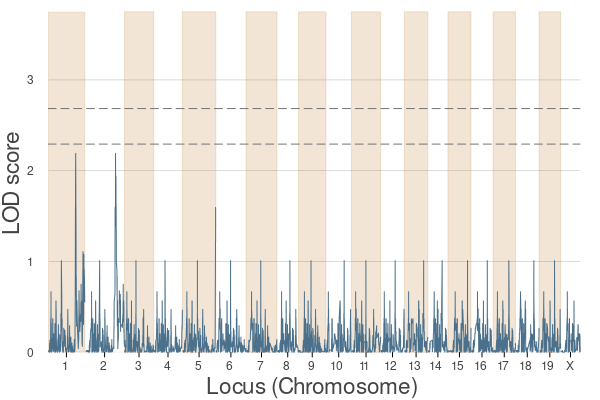

In [22]:
#########
# Plots #
#########


# QTL plots
plot_QTL(single_results_perms, gInfo, mbColname = "Pos")





In [23]:
# Manhattan plots
plot_manhattan(single_results_perms, gInfo, mbColname = "Pos")

LoadError: UndefVarError: `plot_manhattan` not defined